# Assignment 1

In [18]:
using Plots

In [131]:
"""
Implementation of a second-order Runge-Kutta ODE
solver.

# Arguments
fs: Tuple
    Collection of m functions for the ode
    ẋ = f(x)
initial_conditions: Array
    Collection of m initial conditions
Δt: float
    Timestep size
T: float / int
    Time of integration

Returns
-------
Array of size (T / Δt + 1, m) of the integration
the system from 0 to T
"""
function rk2(fs, initial_conditions, Δt, T)
    yn = initial_conditions[:]
    n_steps = Int(T / Δt + 1)
    n_params = length(initial_conditions)
    
    hist = zeros(n_steps, n_params)
    hist[1, :] = yn
    
    for ti=2:n_steps
        k1 = Δt .* [f(yn...) for f in fs]
        k2 = Δt .* [f(yn + k1 / 2...) for f in fs]
        yn = yn + k2
        hist[ti, :] = yn
    end
    
    return hist
end

rk2

* $r$: pray birth rate
* $q$: predator decay 
* $e$: efficiency for converting preys into food

In [240]:
s = 0.5 # search efficiency
r = 0.5 # pray birth rate
q = 0.5 # predator decay
e = 0.9 # food efficiency


K = 10
T = 100
dt = 0.01

system = ((N, P) -> r * N * (1 - N / K) - s * N * P,
          (N, P) -> -q * P + e * s * N * P)

(var"#655#657"(), var"#656#658"())

In [241]:
q

0.5

In [242]:
e * K * s

4.5

In [243]:
N_star = q / (e * s)
P_star = r * (1 - q / (K * e * s)) / s

0.8888888888888888

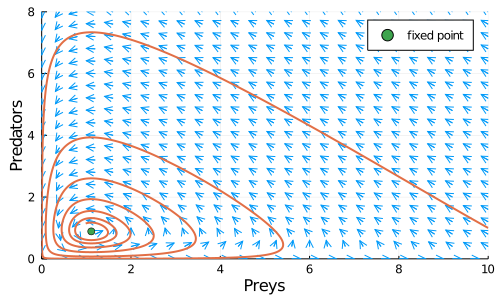

In [247]:
df(N, P) = [system[1](N, P), system[2](N, P)] / 5sqrt(system[1](N, P) ^ 2 +  system[2](N, P) ^ 2)

N0, P0 = 10, 1
path = rk2(system, [N0, P0], dt, T);

vmin, vmax = 0, 10
ymax = 8
xs = vmin:0.4:vmax
ys = vmin:0.4:ymax

xxs = [x for x in xs for y in ys]
yys = [y for x in xs for y in ys];


quiver(xxs, yys, quiver=df, size=(500, 300))
plot!(path[:, 1], path[:, 2], linewidth=2, label=nothing)
scatter!([N_star], [P_star], label="fixed point")
plot!(xlabel="Preys", ylabel="Predators",
     ylim=(0, ymax), xlim=(0, 10))

In [245]:
-(q * r) / (e * K * s)

-0.05555555555555555